In [12]:
import gdown
import zipfile
import os

# ID của file Google Drive bạn muốn tải
file_id = "1mc89F1dkQ6XRQnwQTqqryjaXt5ZWXTT0"

# Tạo URL gốc từ file ID
url = f"https://drive.google.com/uc?id={file_id}"

# Đường dẫn để lưu file zip
output = "BTC-Daily.zip"

# Tải file từ Google Drive
print("Đang tải file từ Google Drive...")
gdown.download(url, output, quiet=False)

# Giải nén file zip
print("Đang giải nén file...")
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall() 
    
print("Hoàn tất! File đã được tải và giải nén.")

# (Tùy chọn) Xóa file zip sau khi giải nén
os.remove(output)

Đang tải file từ Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1mc89F1dkQ6XRQnwQTqqryjaXt5ZWXTT0
To: d:\Asus\AIO\AIO_Meeting\module4\main class\10_10_2025\BTC-Daily.zip
100%|██████████| 95.7k/95.7k [00:00<00:00, 1.16MB/s]

Đang giải nén file...
Hoàn tất! File đã được tải và giải nén.


## Bước 1: Tải và đọc dữ liệu
- Loại dòng trùng lặp

In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv("./BTC-Daily.csv")
df = df.drop_duplicates()
df.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


## Bước 2: Khám phá dữ liệu

2014-11-28 to 2022-03-01


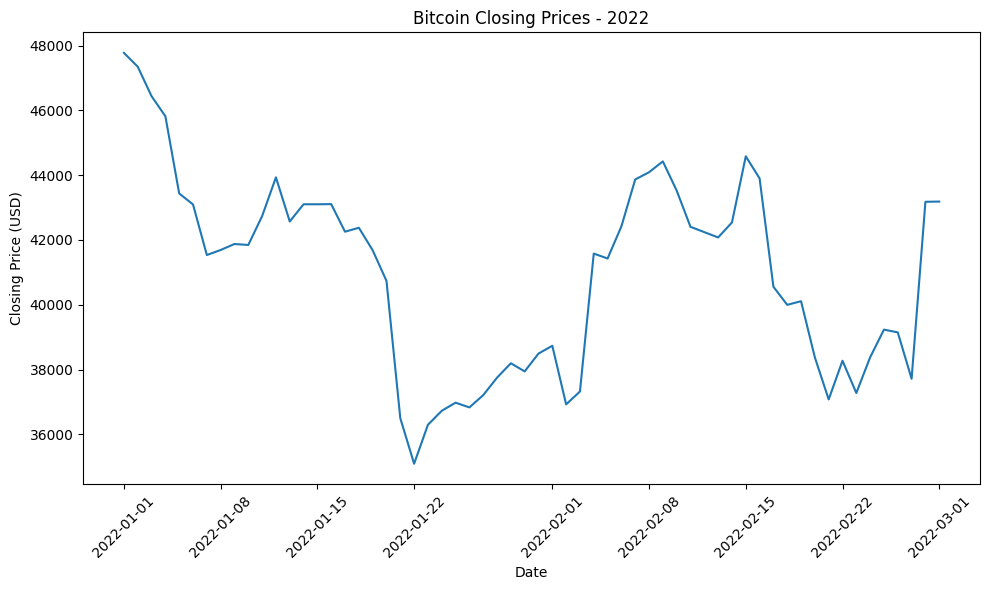

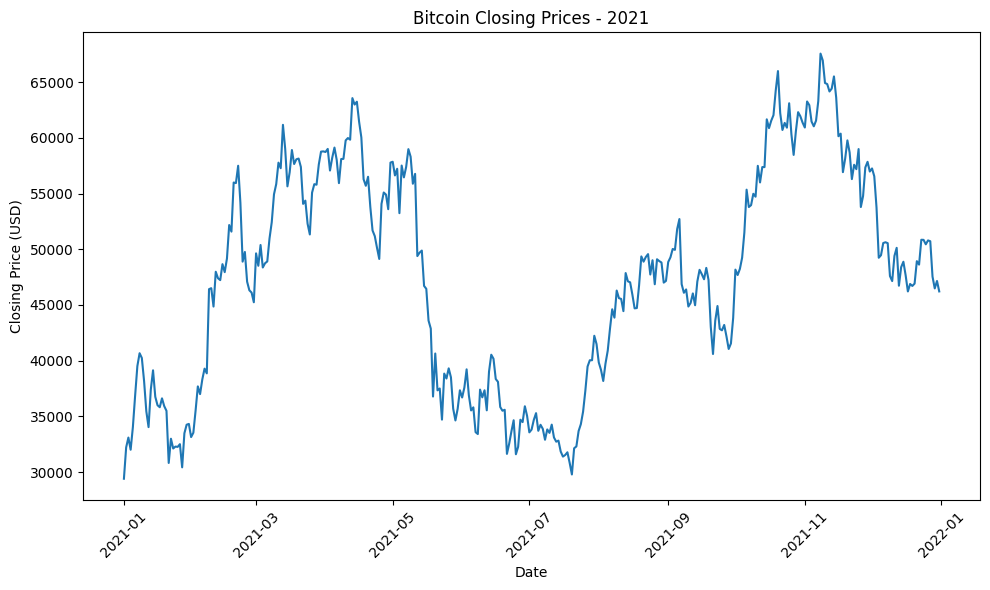

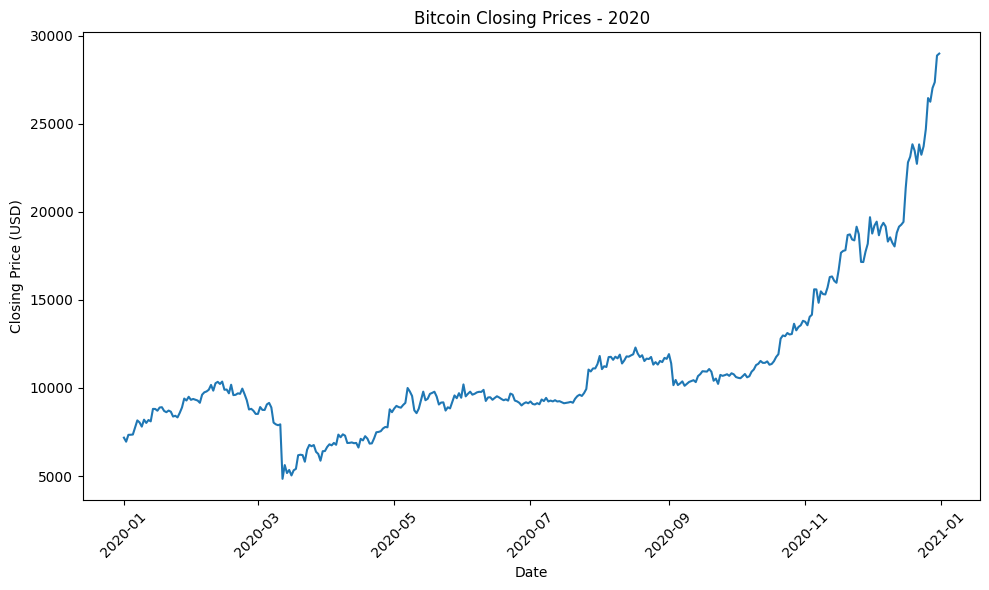

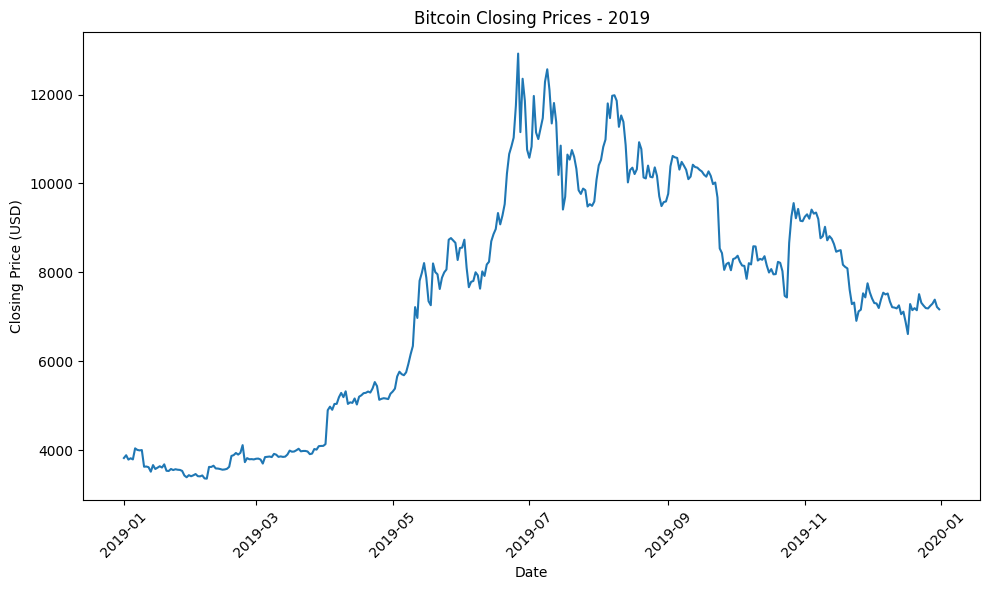

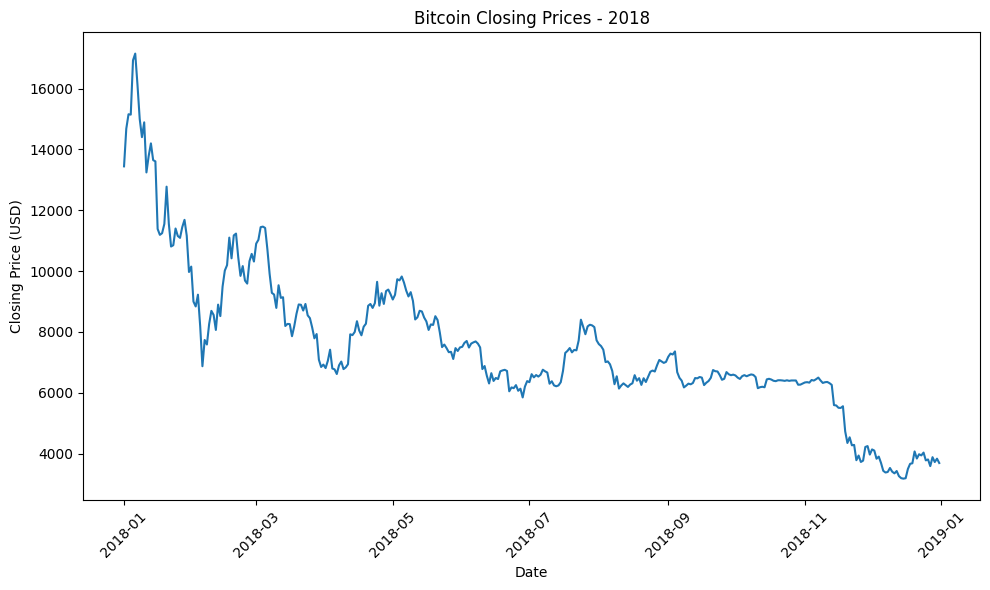

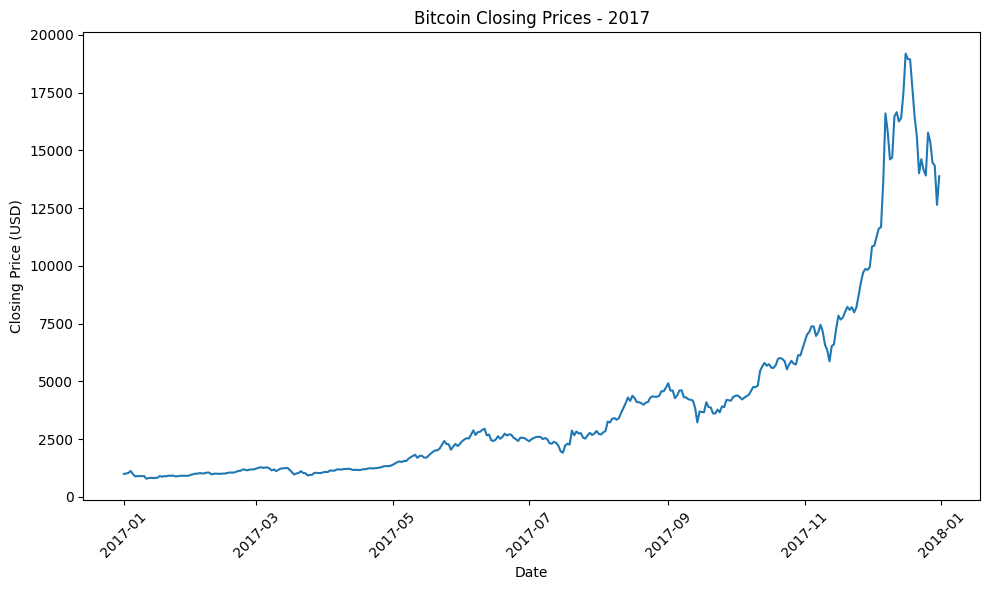

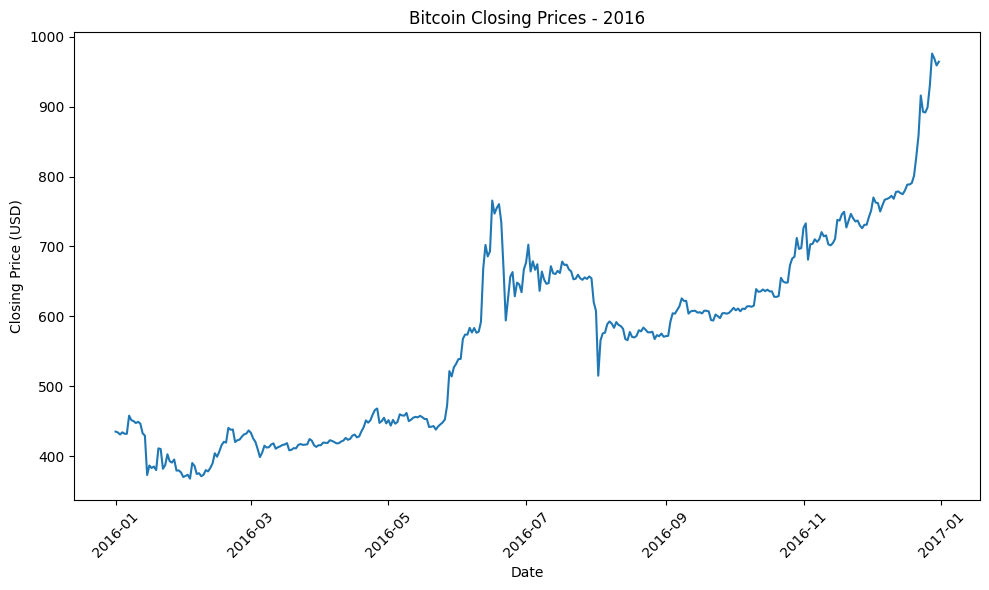

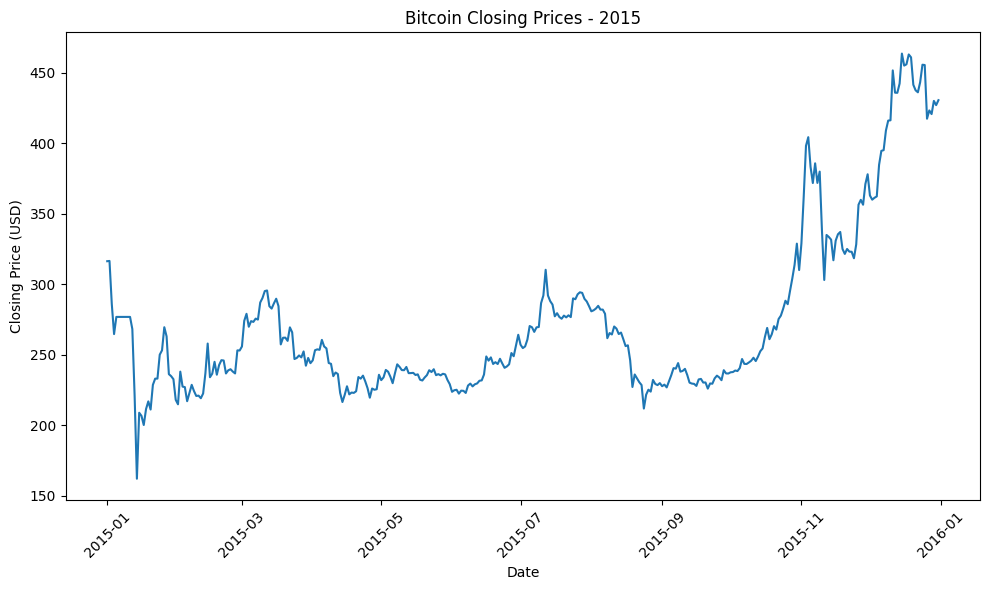

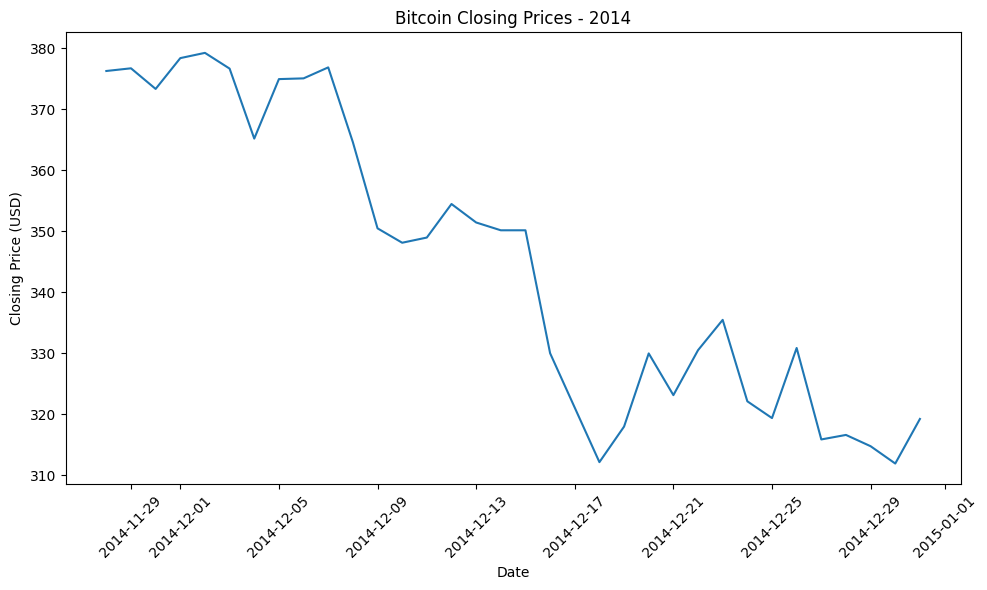

In [14]:
# Range of dates covered
df["date"] = pd.to_datetime(df["date"])
date_range = str(df["date"].dt.date.min()) + " to " +str(df["date"].dt.date.max())
print(date_range)

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day


unique_years = df["year"].unique()
for year in unique_years:

    dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq="D")
    year_month_day = pd.DataFrame({"date": dates})
    year_month_day["year"] = year_month_day["date"].dt.year
    year_month_day["month"] = year_month_day["date"].dt.month
    year_month_day["day"] = year_month_day["date"].dt.day


    merged_data = pd.merge(year_month_day, df, on=["year", "month", "day"], how="left")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data["date_x"], merged_data["close"])
    plt.title(f"Bitcoin Closing Prices - {year}")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Bước 3: Tạo mô hình Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()


## Bước 4: Chia tập train và test
- Chuẩn hóa

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[["open", "low", "high"]].values
y = df["close"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


## Bước 5: Huấn luyện

In [17]:
linear_regressor.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Bước 6: Đánh giá

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Make predictions on the test set
y_pred = linear_regressor.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error (MSE):", round(mse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("R-squared:", round(r2, 4))


Mean Square Error (MSE): 114200.2975
Mean Absolute Error (MAE): 143.9742
R-squared: 0.9996


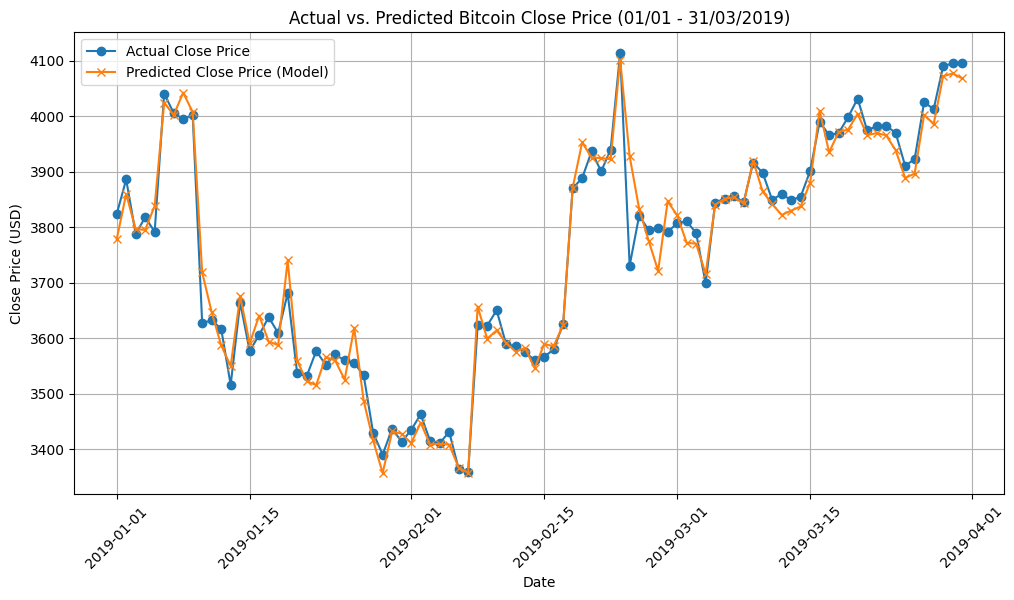

In [19]:
# Lọc dữ liệu 2019 Q1
df_2019_Q1 = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2019-03-31")].copy()

# Chọn đúng các cột feature đã train
X_2019 = df_2019_Q1[["open", "low", "high"]].values
X_2019_scaled = scalar.transform(X_2019)
y_2019 = df_2019_Q1["close"].values

# Dự đoán bằng model sklearn
y_pred_2019 = linear_regressor.predict(X_2019_scaled)

# Gắn vào dataframe để tiện vẽ
df_2019_Q1["predicted_close"] = y_pred_2019

# Vẽ
plt.figure(figsize=(12,6))
plt.plot(df_2019_Q1["date"], df_2019_Q1["close"], label="Actual Close Price", marker="o")
plt.plot(df_2019_Q1["date"], df_2019_Q1["predicted_close"], label="Predicted Close Price (Model)", marker="x")
plt.title("Actual vs. Predicted Bitcoin Close Price (01/01 - 31/03/2019)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
